# Компьютерное зрение

# Работа с изображениями

## Полносвязная сеть
<img src="images/LessonsII/mnist_fc.png" width=60% height=60%>
Количество весов первого слоя = высота * ширина * каналы * количество нейронов скрытого слоя

## Сверточная нейронная сеть

![Архитектура](https://upload.wikimedia.org/wikipedia/commons/5/55/%D0%90%D1%80%D1%85%D0%B8%D1%82%D0%B5%D0%BA%D1%82%D1%83%D1%80%D0%B0_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D0%B9_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8.png)



## Свёртка
Свертка (англ. convolution) — это операция, показывающая «схожесть» одной функции с отражённой и сдвинутой копией другой. Понятие свёртки обобщается для функций, определённых на группах, а также мер. 

<img src="images/LessonsII/convolution.jpeg" alt="Conv" height=40% width=40%>
$$O_{i, j} = f(K*I_{i-s:i+s, j-s:j+s})$$

$K$ - ядро свёртки  
$I$ - входной тезнор  
$I_{i-s:i+s, j-s:j+s}$ - срез тензора размера ядра свёртки с центром в точке (i, j)  
$O_{i, j}$ - результат свёртки (значение выходного тензора в точке (i, j))  
$f$ - функция активации

Слой свёртки (convolutional layer) — это основной блок свёрточной нейронной сети. Слой свёртки включает в себя для каждого канала свой фильтр, ядро свёртки которого обрабатывает предыдущий слой по фрагментам (суммируя результаты поэлементного произведения для каждого фрагмента). Весовые коэффициенты ядра свёртки (небольшой матрицы) неизвестны и устанавливаются в процессе обучения.

![Свёртка](https://neurohive.io/wp-content/uploads/2018/07/2d-covolutions.gif)

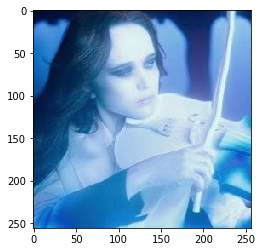

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('data/Vanya.jpg')[..., ::-1]
plt.imshow(image)
plt.show()

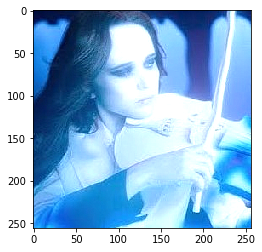

In [2]:
# увеличение чёткости
kernel = np.array([
    [-0.1, -0.1, -0.1],
    [-0.1,    2, -0.1],
    [-0.1, -0.1, -0.1],
])
img_out = cv2.filter2D(image, -1, kernel)
plt.imshow(img_out)
plt.show()

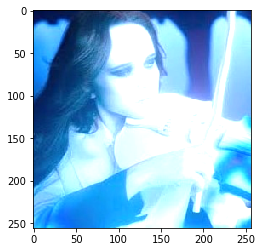

In [4]:
# увеличение яркости
kernel = np.array([
    [-0.1,  0.2, -0.1],
    [ 0.2,    1,  0.2],
    [-0.1,  0.2, -0.1],
])
img_out = cv2.filter2D(image, -1, kernel)
plt.imshow(img_out)
plt.show()

### Ядра нейронной сети
<img src="images/LessonsII/kernels.jpeg" width=60% height=60%>
Каждый из 96 фильтров, показанных здесь, имеет размер 11x11x3

### CNN Explainer
#### https://poloclub.github.io/cnn-explainer/
#### https://adamharley.com/nn_vis/

# Свёрточный слой
<img src="images/LessonsII/conv1.png" width=60% height=60%>

## Max Pooling
<img src="images/LessonsII/maxpool.jpeg" width=60% height=60%>

## Свёрточная сеть
<img src="images/LessonsII/convnet.jpeg" width=80% height=80%>
Карты активации примера архитектуры ConvNet. Первоначальные данные представляют собой необработанные пиксели изображения (слева), а последний выход хранит оценки классов (справа).

In [2]:
# Огромное количество слоев, огромное число ядер свёртки, будет ли работать быстро?
# Если расчитывать результат свёртки в цикле, то нет

### im2col:
<img src="images/LessonsII/im2col.png" width=60% height=60%>

<img src="images/LessonsII/im2col_2.png" width=60% height=60%>

### Padding
<img src="images/LessonsII/pad.png" width=60% height=60%>

### Stride
<img src="images/LessonsII/stride.png" width=60% height=60%>
Шаг (stride) 3 и 2 по высоте и ширине соответственно.

## Задания

1. Написать функцию, переводящую изображение в матрицу столбцов - im2col(). На вход функция принимает изображение и размер свёртки, возвращает столбцы.
2. Написать функцию свёртки, которая работает без циклов. Вместо циклов, она использует im2col(), для перевода изображения в набор столбцов.
3. Сравнить результаты с torch.nn.Conv2d 


## Лабораторная работа 14.
0. Принимается только после демонстрации функции im2col() из задания выше.
1. Задача классификации изображений (https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html?highlight=mnist). Повторить тренировку модели (train) и запустить классификацию изображений (inference).
2. Получить максимальную точность классификации (минимальный loss) путём изменения модели, например, добавлением скрытых слоёв.
3. По возможности обучить на GPU.